In [42]:
from scipy.io import wavfile
from IPython.display import Audio, display
import pywt
from scipy.fftpack import dct, idct
import numpy as np
import pandas as pd

In [5]:
file_name = '/mnt/c/voicedata/singing.wav'

In [6]:
rate, data = wavfile.read(file_name)
print("rate: ", rate)
display(Audio(data, rate=rate))

rate:  44100


In [7]:
# time domain statistics (describe the signal)

data_series = pd.Series(data)
data_series.describe()




count    5.486460e+05
mean     3.454471e+04
std      5.014222e+08
min     -2.147484e+09
25%     -2.135818e+08
50%      1.835008e+06
75%      3.338895e+08
max      1.657209e+09
dtype: float64

In [11]:
data = data / data.max()
display(Audio(data, rate=rate))

In [25]:
message = "xianyue"
message_bits = ''.join([format(ord(c), '08b') for c in message])
message_bits

'01111000011010010110000101101110011110010111010101100101'

In [13]:
(cA, cD) = pywt.dwt(data, 'db1')

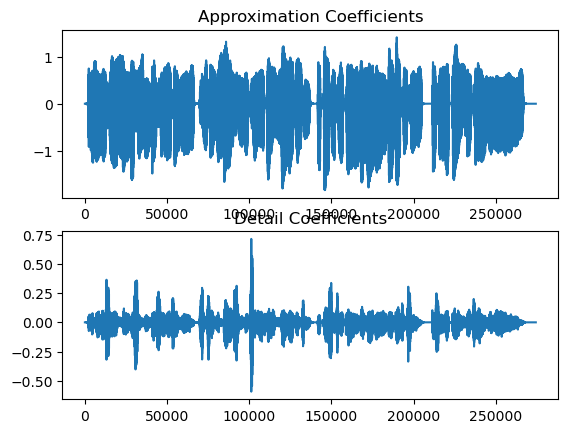

In [34]:
# draw the wavelet transform
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(cA)
plt.title("Approximation Coefficients")
plt.subplot(2, 1, 2)
plt.plot(cD)
plt.title("Detail Coefficients")
plt.show()


In [15]:
# base
display(Audio(cA, rate=rate / 2))

In [16]:
# detail
display(Audio(cD, rate=rate / 2))

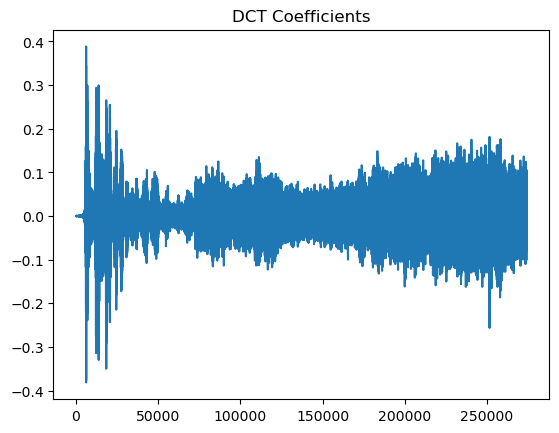

In [51]:
dctcoef = dct(cD, norm='ortho')
# draw the dct
plt.figure()
plt.plot(dctcoef)
plt.title("DCT Coefficients")
plt.show()

In [68]:
alpha = 0.5 * (dctcoef.max() - dctcoef.min())
watermarked_payload = dctcoef.copy()



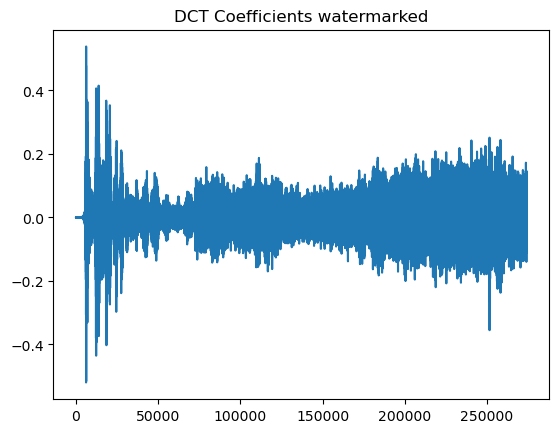

In [69]:
wm_inx = 0
for i in range(watermarked_payload.size):
    if watermarked_payload[i] == 0:
        continue
    watermarked_payload[i] += alpha * int(message_bits[wm_inx]) * dctcoef[i]
    wm_inx = (wm_inx + 1) % len(message_bits)
plt.figure()
plt.plot(watermarked_payload)
plt.title("DCT Coefficients watermarked")
plt.show()

In [70]:
# icdt

watermarked_cD = idct(watermarked_payload, norm='ortho')
display(Audio(watermarked_cD, rate=rate / 2))

In [71]:
watermarked_data = pywt.idwt(cA, watermarked_cD, 'db1')
display(Audio(watermarked_data, rate=rate))

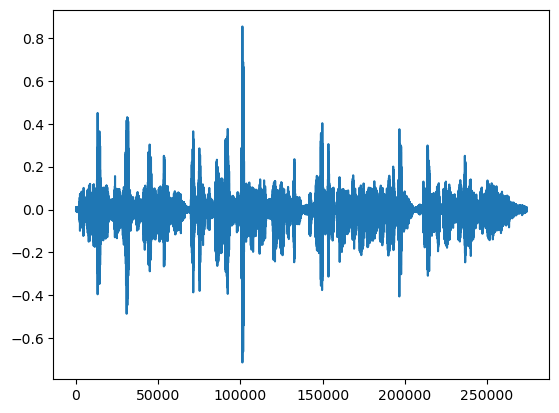

In [82]:
# extract the watermark
watermarked_data = watermarked_data / watermarked_data.max()
extracted_cD = pywt.dwt(watermarked_data, 'db1')[1]


plt.figure()
plt.plot(extracted_cD)
plt.show()



<Figure size 640x480 with 0 Axes>

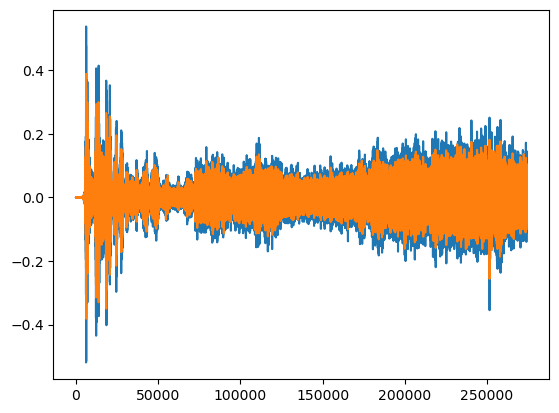

<Figure size 640x480 with 0 Axes>

In [84]:
extracted_dct = dct(extracted_cD, norm='ortho')
plt.plot(extracted_dct)
plt.plot(dctcoef)
plt.figure()

In [89]:
extracted_message_bits = np.zeros(watermarked_payload.size)
for i in range(watermarked_payload.size):
    if watermarked_payload[i] == 0:
        continue
    extracted_message_bits[i] = int((extracted_dct[i] - dctcoef[i]) / alpha / dctcoef[i] + 0.5)

for i in range(0, len(extracted_message_bits), 8):
    print(chr(int(''.join([str(int(x)) for x in extracted_message_bits[i:i+8]]), 2)), end='')

xianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyuexianyu

In [ ]:
# majority vote
